# Лабораторная работа №1

#### Постановка задачи
Дан неориентированный граф и две вершины <i>u</i> и <i>v</i>. Проверить существует ли путь между <i>u</i> и <i>v</i>.
#### Формат входных данных
Неориентированный граф с <i>n</i> вершинами и <i>m</i> ребрами. Следующие строки содержат две вершины <i>u</i> и <i>v</i> графа
#### Ограничения
2 <= <i>n</i> <= 10^3; 1 <= <i>m</i> <= 10^3; 1 <= <i>u, v</i> <= n; <i>u</i> != <i>v</i>
#### Формат выходных данных
1 если путь между <i>u</i> и <i>v</i> существует, 0 иначе

In [1]:
import io
from IPython.display import display
import fileupload

from datetime import datetime
fin = ''; # Здесь будет название файла, в котором будут тесты
# В данной ячейке представлен код для создания и отображения виджета
# Создание виджета для загрузки файла, в которых находятся тесты
_upload_widget = fileupload.FileUploadWidget()

# Функция обратного вызова для виджета загрузки файла
def _cb(change):
    global fin
    decoded = io.StringIO(change['owner'].data.decode('utf-8'))
    fin = change['owner'].filename
    print('Uploaded `{}` ({:.2f} kB)'.format(fin, len(decoded.read()) / 2 **10))

_upload_widget.observe(_cb, names='data')
display(_upload_widget) # Отображение виджета

Uploaded `05.in` (0.04 kB)


#### Инициализация

Считывание файла, в котором граф представлен в виде списка ребёр с заданным количеством вершин.
Также созданим объект графа graphviz'a, который необходим для визуализации графа (с количеством вершин не более 100).

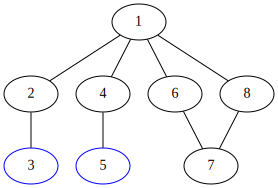

In [2]:
import problem2.main as p2
import graphviz as gv
from datetime import datetime

begin1 = datetime.now()
# Считывание строк из файла
f = open("tests/" + fin, "r")
lines = [ line for line in f ]
n, m = lines[0].split()
n = int(n)
m = int(m)
a, b = lines[m + 1].split()
a = int(a) - 1
b = int(b) - 1
# Graph - функция graphviz'a, которая создает объект граф
dot = gv.Graph(comment = "test")

# Добавление узлов, с установкой цвета:
# синим цветом выделяются узлы, между которыми нужно найти путь
# остальные узлы - черные
for v in range(1, n + 1):
    vcolor = "blue" if (v == a + 1 or v == b + 1) else "black"
    dot.node(str(v), color=vcolor) 

# Добавление ребер    
for i in range(1, m + 1):
    u, v = lines[i].split()
    dot.edge(str(int(u)), str(int(v)))

time1 = float((datetime.now() - begin1).microseconds)/1000000.0
# Визуализация графа
dot

#### Описание алгоритма
Чтобы найти путь от одной вершины в другую, запускаем dfs от одной вершины до тех пор пока не достигнем вторую вершину.
Алгоритм описан в

time:  0.008005 sec


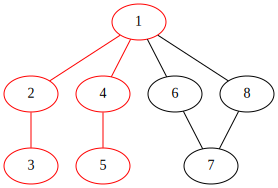

In [3]:
begin2 = datetime.now()
G = p2.graph_init(lines, n, m) # Инициализация графа. G - граф
path = p2.solve(G, a, b) # solve принимает граф, и два узла, между которыми необходимо найти путь. Возвращает путь в path
# print(path) # Вывод пути

# Строим новый граф, уже с прорисованным путем
dot = gv.Graph(comment = "test")

# Добавление узлов.
# красным цветом выделены все узлы, через которые проходит путь, 
# включая узлы между которыми нужно найти путь
# то есть, если путь не найден, то все узлы будут черными
for v in range(1, n + 1):
    vcolor="black"
    if v in path:
        vcolor="red"
    dot.node(str(v), color=vcolor)

# Добавление ребер
# красным цветом выделяются все ребра между вершинами из найденного пути
# черным - остальные ребра
# то есть, если путь не найден, все ребра окрашены в черный.
for i in range(1, m + 1):
    u, v = lines[i].split()
    ecolor = "black"
    for i in range(len(path) - 1):
        j = i + 1
        if (path[i] == int(u) and path[j] == int(v)) or (path[i] == int(v) and path[j] == int(u)):
            ecolor = "red"
            break
    dot.edge(u, v, color = ecolor)
print("time: ", time1+float((datetime.now() - begin2).microseconds)/1000000.0, "sec")
# Визуализация графа
dot

#### Реализация алгоритма решения

In [4]:
# %load problem2/main.py
import sys
from datetime import datetime

sys.setrecursionlimit(10000)
# Класс Vertex для описания вершины в графе. Граф - массив вершин
# Атрибуты: used(метка), edges(рёбра)
# edges - массив, состоящий из номеров вершин, к которым существует ребро
# used - bool, используется как метка, что вершина посещена/использована
class Vertex:
    def __init__(self):
        self.edges = []
        self.used = False


# DFS. Поиск в глубину
# аргументы: graph (массив из вершин(Vertex)), v (int - текущая вершина, которую сейчас посещаем), dest (int - destination. Номер вершины к которой ищем путь)
# возвр. значения: path (путь в обратном порядке от заданной вершины v до вершины dest)
def dfs(graph, v, dest):
    graph[v].used = True
    if v == dest:
        return [v + 1]
    for i in graph[v].edges:
        if not graph[i].used:
            path = dfs(graph, i, dest)
            if len(path) > 0:
                path.append(v + 1)
                return path
    return []

# Функция инициализирующая граф данными из файла.
# аргументы: lines (массив строк из файла), m, n - число рёбер и вершин соответственно
# возвр. значения: graph (массив вершин, граф в виде списков смежности)
def graph_init(lines, n, m):
    graph = [ Vertex() for i in range(n) ]
    for i in range(1, m + 1):
        u, v = lines[i].split()
        u = int(u) - 1
        v = int(v) - 1
        graph[u].edges.append(v)
        graph[v].edges.append(u)
    return graph

# Функция для измерения времени работы программы
# аргументы: graph (граф, массив вершин), vertexA, vertexB (вершины между которыми ищем путь)
# возвр. значения: path: array of int (путь между вершинами, массив целых чисел)
def solve(graph, a, b):
    path = dfs(graph, a, b)
    return path


#### Тестирование
Работоспособность алгоритма проверена на 13 тестах.

##### Тест 1
Простой граф из 2 вершин и 1 ребра.
1 компонента связности. 
Путь существует.

##### Тест 2
Простой граф из 3 вершин и 2 рёбер между ними.
1 компонента связности.
Путь существует.

##### Тест 3
Несвязный граф из 2 компонент связности. 
7 вершин. 6 рёбер.
Путь не существует.

##### Тест 4
Связный граф из 7 вершин и 6 рёбер.
Путь существует.

##### Тест 5
Усложнённое дерево. Связный граф из 8 вершин и 7 рёбер.
Путь существует.

##### Тест 6
Несвязный граф из 15 вершин и 13 ребёр. Одна вершина отдельная компонента связности.
Всего 2 компонены связности.
Путь существует.

##### Тест 7
Усложнённый тест 6. Добавлена новая компонента связности.
18 вершин. 15 рёбер.
Путь не существует.

##### Тест 8
Связный граф. 11 вершин. 10 рёбер. 
Другая структура графа.
Путь существует.

##### Тест 9
Связный граф. 7 вершин. 6 рёбер. 
Изменённое дерево.
Путь существует.

##### Тест 10
Сложный тест. 1000 вершин. 957 рёбер.
Время работы: ~0.168586 сек.
193 компоненты связности.
Путь существует.

##### Тест 11
Сложный тест. 1000 вершин. 1000 рёбер.
Время работы: ~0.099998 сек.
164 компоненты связности.
Путь не существует.

##### Тест 12
Сложный тест. 776 вершин. 1000 рёбер.
Время работы: ~0.346329 сек.
62 компоненты связности.

##### Тест 13
Сложный тест "Змейка". 1000 вершин. 999 рёбер.
Время работы: ~0.824301 сек.
1 компонента связности.